### Display a mosaic of the LSST camera

In [1]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt   # Not needed for image displays, but used for analysis

%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
afwDisplay.setDefaultBackend("matplotlib")

In [3]:
dataRoot = "/project/shared/BOT"
calibRoot=os.path.join(dataRoot, "rerun/rhl", "CALIB-6813D")

butler = dafPersist.Butler(dataRoot, calibRoot=calibRoot)

camera = butler.get("camera")

dataId = dict(run='12526')

It'll be easier to see if we correct for the gains.

To do this, we'll define a custom callback:

In [4]:
def myCallback(im, ccd, imageSource):
    """Assemble the CCD image, subtracting the overscan correcting for the gain"""

    return cameraGeomUtils.rawCallback(im, ccd, imageSource,
                                       subtractBias=True, correctGain=False)

In [5]:
butler.queryMetadata('raw', ['dayObs', 'visit'], dataId, seqNum=32)

[('2020-08-25', 3020082500032)]

In [6]:
seqNum = 32

disp = afwDisplay.Display(1, reopenPlot=True)
disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
disp.scale('asinh', 5, 7000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')

#
# Set detectorNameList to only display a subset of the detectors
#
if False:   # just a single raft
    detectorNameList = [det.getName() for det in camera if "R22" in det.getName()]
elif False:
    detectorNameList = ['R22_S11']
else:
    detectorNameList = [camera[det].getName() for det in butler.queryMetadata('raw', ['detector'], run=dataId['run'], seqNum=seqNum)] # [0:22]

dataType = "raw"
mos = cameraGeomUtils.showCamera(camera,
                                 cameraGeomUtils.ButlerImage(butler, dataType, run=dataId["run"], seqNum=seqNum,
                                                             callback=myCallback, verbose=True),
                                 binSize=16, detectorNameList=detectorNameList, display=disp, overlay=False,
                                 title=f'{dataId["run"]} {seqNum}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

MC_C_20200825_000032 R00_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SG1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SW0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SW1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S00: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S01: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S02: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S10: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S11: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S12: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S20: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R01_S21: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C

KeyboardInterrupt: 

In [7]:
plt.savefig("BOT-Flammarion.png")

In [8]:
disp = afwDisplay.Display(1, reopenPlot=True)
disp.setImageColormap('viridis' if False else 'gray')

disp.scale('asinh', 'zscale', Q=2)

disp.mtv(mos)
plt.title(f'{dataId["run"]} {seqNum}');

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Just assemble the corner rafts, and use matplotlib to make the mosaic

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

disp = afwDisplay.Display(fig)
disp.scale('asinh', 'zscale', Q=2)
disp.scale('linear', 'minmax')
disp.scale('asinh', 5, 7000, Q=2)

disp.setImageColormap('viridis' if True else 'gray')
disp.show_colorbar(False)

dataType = "raw"
seqNum = 32

for i, raftName in enumerate(['R40', 'R44', 'R00', 'R04'], 1):
    ax = fig.add_subplot(2, 2, i)

    detectorNameList = [det.getName() for det in camera if f"{raftName}" in det.getName()]

    mos = cameraGeomUtils.showCamera(camera,
                                     cameraGeomUtils.ButlerImage(butler, dataType, run=dataId["run"], seqNum=seqNum,
                                                                 callback=myCallback, verbose=True),
                                     binSize=4, detectorNameList=detectorNameList, display=disp, overlay=False,
                                     title=raftName)
    disp.show_colorbar(False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

MC_C_20200825_000032 R40_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R40_SG1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R40_SW0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R40_SW1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R44_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R44_SG1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R44_SW0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R44_SW1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SG1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SW0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R00_SW1: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C

Check out the individual FITS to make sure I get the names of guider sensors right: 

In [8]:
import astropy.io.fits as fits

In [10]:
flammarionDir = '/project/shared/BOT/_parent/raw/2020-08-25/3020082500032/'
fileList  = os.listdir(flammarionDir)

In [13]:
filePath =os.path.join(flammarionDir, '3020082500032-R44-SG1-det202.fits')
hdul = fits.open(filePath)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot = "/project/shared/BOT"
calibRoot=os.path.join(dataRoot, "rerun/rhl", "CALIB-6813D")
butler = dafPersist.Butler(dataRoot, calibRoot=calibRoot)


In [34]:
dataId = dict(run='12526', visit=3020082500032, raftName='R04', detectorName='SG0')
butler.datasetExists('raw', dataId)
post = butler.get('raw', dataId)
rawImage = post.image.array


MC_C_20200825_000032 R04_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)
MC_C_20200825_000032 R04_SG0: No FILTER key found but FILTER2="ND_OD1.0" (removed)


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,10))
ax.imshow(rawImage.T, origin='lower',vmin=10000, vmax=22000)

(array([0.000000e+00, 1.600930e+05, 1.446559e+06, 1.076851e+06,
        7.586563e+06, 4.836116e+06, 2.232597e+06, 1.534231e+06,
        6.900000e+01, 3.900000e+01]),
 array([10000., 11200., 12400., 13600., 14800., 16000., 17200., 18400.,
        19600., 20800., 22000.], dtype=float32),
 <BarContainer object of 10 artists>)

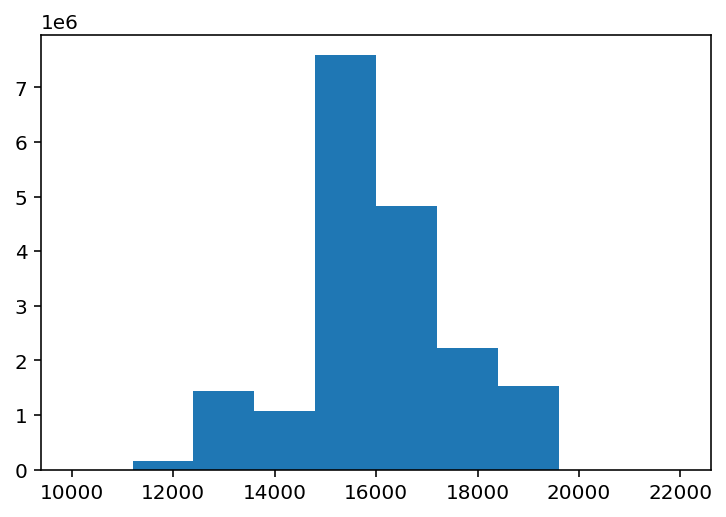

In [30]:
plt.hist(np.ravel(rawImage), range=(10000,22000))
